In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read results into dataframe
mreib= '../../model/model_versions/v_7/v_7_1/0058308.txt'
smrib= '../../model/model_versions/v_7/v_7_1/0058208.txt'

### Quartiles

In [3]:
def prepare_quantiles(file_path):
    """
    Reads a tab-separated file into a pandas DataFrame with the first column as the index.

    Parameters:
    file_path (str): The path to the file to read.

    Returns:
    pd.DataFrame: The resulting DataFrame.
    """
    flow= pd.read_csv(file_path, index_col=0, sep='\t')
   # flow= pd.read_excel(file_path, index_col=0)
    
    flow = flow.drop(flow.index[0])
    
    # Ensure the index is datetime
    flow.index = pd.to_datetime(flow.index)
    
    # Ensure the 'cout' column is of float type
    flow['cout'] = flow['cout'].astype(float)
    flow['rout'] = flow['rout'].astype(float)
    
    # Assuming 'pivoted' is your DataFrame
    flow['rout'].replace(-9999.0, np.nan, inplace=True)
    
    # Convert flow from cfs to cms
   # flow['cout'] *= 0.0283168  # Convert 'cout' from cfs to cms
   # flow['rout'] *= 0.0283168  # Convert 'rout' from cfs to cms
    
    # Extract the day of the year
    flow['day_of_year'] = flow.index.dayofyear
    flow['year'] = flow.index.year

    # Pivot the data to have days of the year as rows and years as columns
    pivoted_sim = flow.pivot_table(values='cout', index='day_of_year', columns='year')

    # pivot rout
    pivoted_obs = flow.pivot_table(values='rout', index='day_of_year', columns='year')

    # Assuming 'pivoted' is your DataFrame
   # pivoted_obs.replace(-9999.0, np.nan, inplace=True)

    # Calculate quartiles for each day of the year
    quartiles_sim = pivoted_sim.quantile([0.025, 0.5, 0.975], axis=1)

    quartiles_obs = pivoted_obs.quantile([0.025, 0.5, 0.975], axis=1)

    return quartiles_sim, quartiles_obs, pivoted_sim, pivoted_obs

In [4]:
mreib_quartile_sim, mreib_quartile_obs, mreib_pivoted_sim, mreib_pivoted_obs= prepare_quantiles(mreib)

In [5]:
smrib_quartile_sim, smrib_quartile_obs, smrib_pivoted_sim, smrib_pivoted_obs= prepare_quantiles(smrib)

In [6]:
mreib_pivoted_sim

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
day_of_year,,,,,,,,,,,,,,,,,,,,,
1,0.000,10.220,0.535,1.328,0.344,0.730,2.084,2.224,0.453,0.306,...,4.280,1.002,0.352,2.050,0.812,1.701,4.439,0.344,1.609,0.998
2,0.023,9.753,0.536,1.277,0.305,0.779,2.051,1.975,0.464,0.272,...,3.376,1.030,0.340,1.875,0.792,1.720,4.516,0.309,1.637,0.984
3,0.133,8.515,0.521,1.156,0.301,0.758,2.042,1.765,0.475,0.245,...,2.651,1.264,0.331,1.595,0.723,1.686,4.329,0.281,1.569,0.993
4,0.248,6.943,0.523,1.005,0.507,0.681,2.070,1.614,0.477,0.243,...,2.147,1.678,0.377,1.309,0.772,1.581,3.989,0.251,1.438,1.023
5,2.647,5.447,0.529,0.991,0.808,0.572,2.120,1.509,0.469,0.476,...,1.839,2.160,0.542,1.045,1.186,1.374,3.632,0.220,1.300,1.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4.390,0.476,1.022,0.523,0.355,2.083,2.643,0.464,0.662,3.730,...,0.772,0.466,0.355,0.781,0.418,2.441,0.540,0.974,1.001,0.239
363,5.304,0.489,1.047,0.519,0.351,2.088,2.628,0.452,0.536,3.871,...,0.985,0.436,0.391,0.657,0.677,2.817,0.508,1.096,1.014,0.256
364,6.752,0.505,1.161,0.467,0.402,2.105,2.621,0.447,0.444,4.133,...,1.076,0.395,0.859,0.641,1.129,3.449,0.469,1.266,1.019,0.275


### Hydrograph

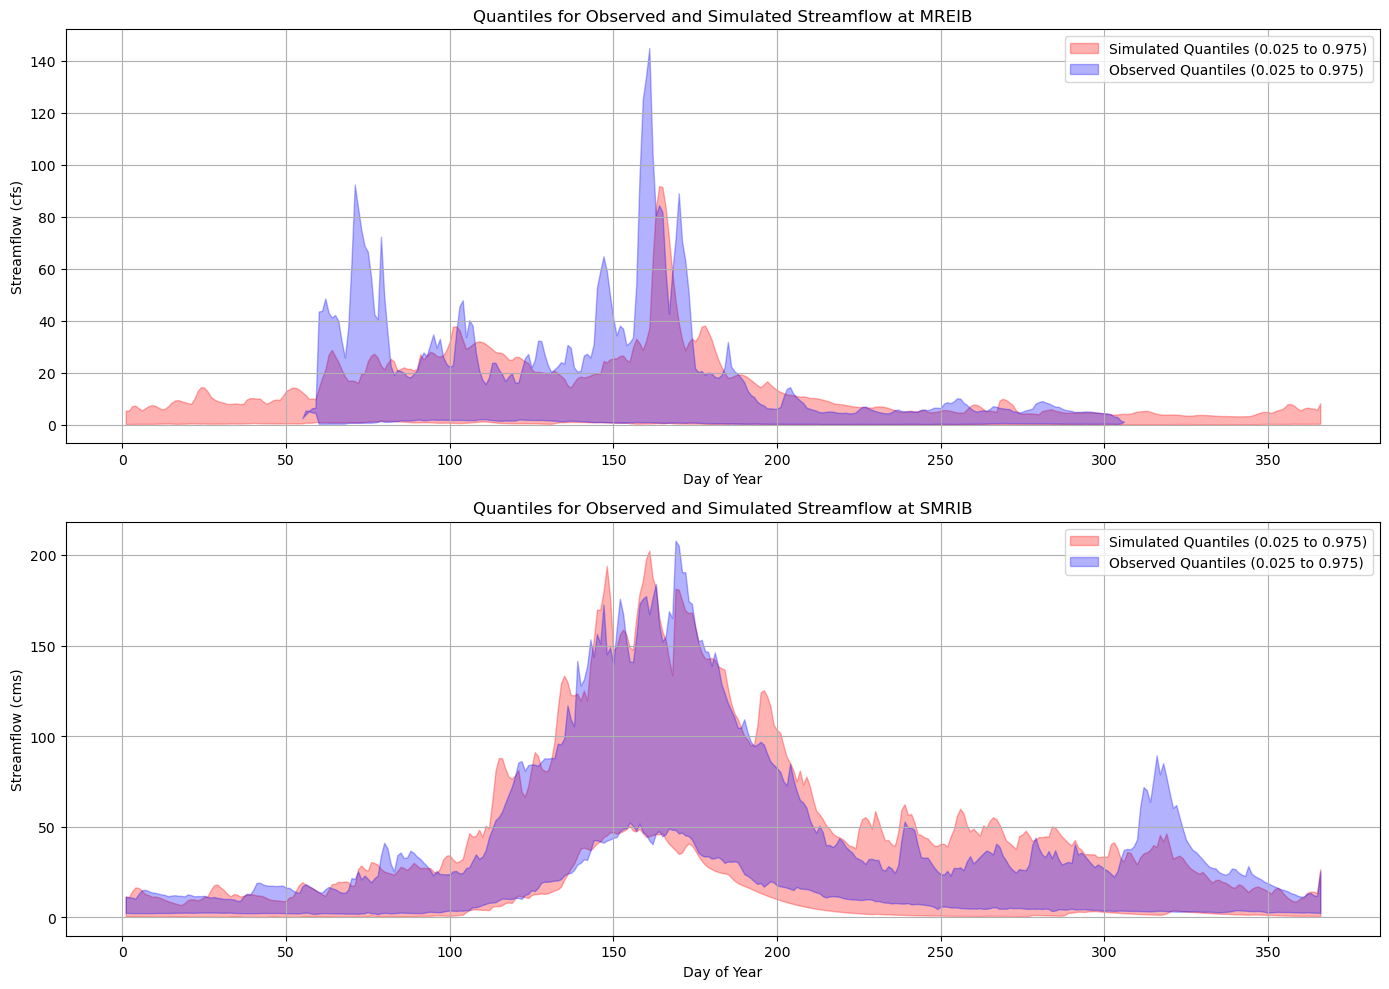

In [7]:
# Plotting for MREIB
plt.figure(figsize=(14, 10))  # Adjust the figure size if needed

plt.subplot(2, 1, 1)  # Subplot for MREIB

# Fill the region between the lower and upper quartiles for simulated data at MREIB
plt.fill_between(mreib_pivoted_sim.index, mreib_quartile_sim.loc[0.025], mreib_quartile_sim.loc[0.975], color='red', alpha=0.3, label='Simulated Quantiles (0.025 to 0.975)')

# Fill the region between the lower and upper quartiles for observed data at MREIB
plt.fill_between(mreib_pivoted_obs.index, mreib_quartile_obs.loc[0.025], mreib_quartile_obs.loc[0.975], color='blue', alpha=0.3, label='Observed Quantiles (0.025 to 0.975)')

plt.xlabel('Day of Year')
plt.ylabel('Streamflow (cfs)')
plt.title('Quantiles for Observed and Simulated Streamflow at MREIB')
plt.grid(True)
plt.legend()

# Plotting for SMRIB
plt.subplot(2, 1, 2)  # Subplot for SMRIB

# Fill the region between the lower and upper quartiles for simulated data at SMRIB
plt.fill_between(smrib_pivoted_sim.index, smrib_quartile_sim.loc[0.025], smrib_quartile_sim.loc[0.975], color='red', alpha=0.3, label='Simulated Quantiles (0.025 to 0.975)')

# Fill the region between the lower and upper quartiles for observed data at SMRIB
plt.fill_between(smrib_pivoted_obs.index, smrib_quartile_obs.loc[0.025], smrib_quartile_obs.loc[0.975], color='blue', alpha=0.3, label='Observed Quantiles (0.025 to 0.975)')

plt.xlabel('Day of Year')
plt.ylabel('Streamflow (cms)')
plt.title('Quantiles for Observed and Simulated Streamflow at SMRIB')
plt.grid(True)
plt.legend()

# Adjust layout and save the plot as a PNG file
plt.tight_layout()
plt.savefig('prms_mreib_and_smrib_quantiles.png')

plt.show()